# <b>Programming For Data Analysis Assignment</b>
***
# numpy.random package explored
This notebook is for the 2020 Programming for Data Analysis assignment.

Author: Keith Ryan (g00387816@gmit.ie)


In [1]:
#Setup import's for subsequent notebook cell's, this defines all packages used directly in this notebook
import numpy as np
import matplotlib.pyplot as plt #used for simple matplotlib visuals
import seaborn as sns #used for fancier visuals like seaborns distplot which overlays a kde over a histogram
import warnings #using this to hide warnings for seaborn distplot, unfortunately this is being depricated
warnings.filterwarnings('ignore') #for any warnings ignore them

# 1. Explaining the Overall Purpose of the numpy.random package
***
### Overview
The <b>numpy.random</b> package allows us to generate pseudo random numbers in Python in a number of different ways, this means the package can be used for a variety of different functions. At its most basic it can give simple random data for adding randomness to some script (like pick a random number from 1 to 10 or a set of numbers like the lottery) or picking a random item from a list (like pick a song from a playlist or a movie), to more complex randomised data for scientific usage like generating a sequence of numbers to represent a type of distibution or picking random samples from a dataset to test and validate a model with.

Numpy as a package in general deals primarily with it's own <i>array</i> data structure (it shares many similarities with Python's native list data structure but with added complexity) and numpy.random generally returns its results as arrays and often expects arrays as one of its inputs(though it can frequently take lists also as will be shown throughout this notebook), given how arrays work in numpy this means we can return random data in different ways so can get multidimensional or flat arrays.

<code>
1-Dimensional Array - [1 2 3]
2-Dimensional Array - [[1 2 3] 
                       [4 5 6]]
</code>
<br>

The small caveat with the numpy.random package is that the numbers generated are not truly random but are generated based off some seed value, so it merely gives the illusion of randomness, however for most purposes pseudo random is sufficient.
One of the advantages of pseudo random numbers is that by providing the same seed, the output will consistent and in some cases this will be important later if you want to test on a reproducable set of random numbers.

### Random Number Generators
Random Number Generators are how the numpy.random package produces its random numbers and this is generally advised on many numpy.random function pages.

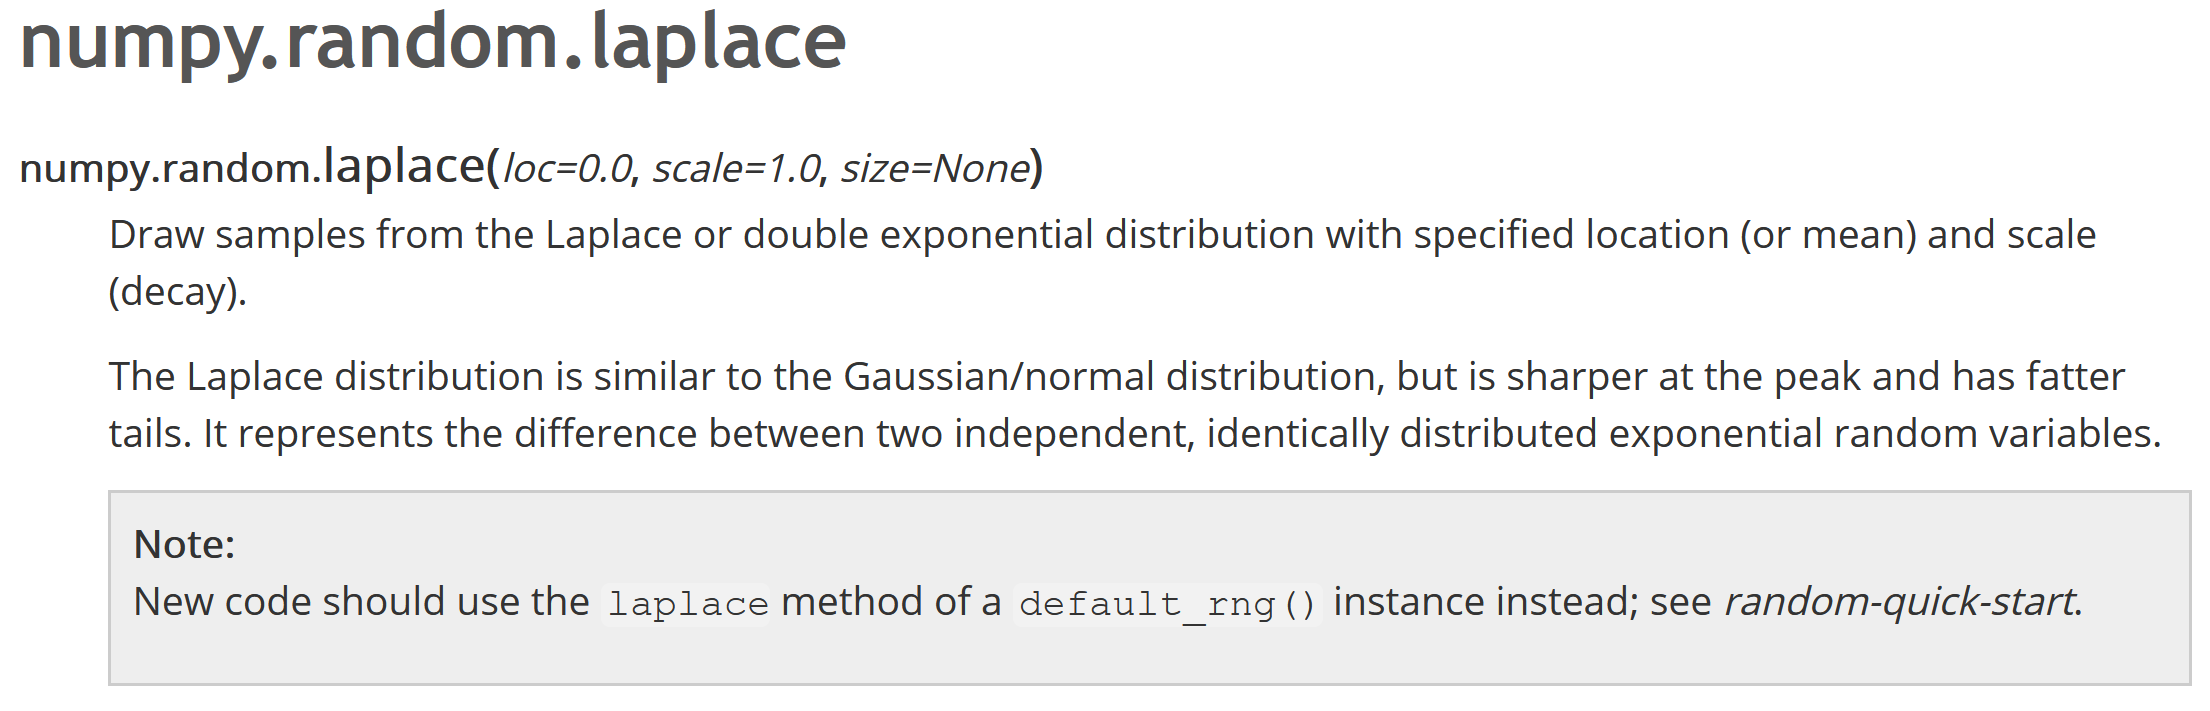

In your function or script you would typically define your random number generator first (perhaps passing it a seed value, to give predictable results) and then picking what generation function and arguments to supply.
See below for a brief example of what this would look like, this well be fleshed out in code cells later with actual examples for Simple Random Data.

```
>>> import numpy as np
>>> rng = np.random.default_rng()
>>> rng.random()
0.04493814959810294
>>> rng.integers(10, size=(4, 5))
array([[0, 3, 7, 1, 7],
       [8, 4, 4, 6, 0],
       [8, 1, 2, 3, 3],
       [1, 7, 3, 5, 6]], dtype=int64)
```


### Distinction Between Generators and Bit Generators
The last thing to consider here is how Generators and Bit Generators interact, the randomness from Generators originates from Bit Generators and when you intialize ``np.random.default_rng()`` or ``np.random.Generator()`` it in turn initializes the Bit Generator, so the two typically work in tandem together with Generator relying on a Bit Generator.

The Bit Generator itself does not directly provide any numbers, instead it manages state, sets the seed and sends back random bits which the Generator interprets as numbers. When no seed value is provided to the Bit Generator it generates a seed from the OS state, alternatively you can provide a seed value as a number or a array of numbers which the Bit Generator will interpret as the seed, it is generally advised to use a 32-bit value as a minimum but in practice you can use as low as 0 (Bit Generators seed values must be positive).

### numpy.random and it's different functions
Broadly the numpy.random package it's [Generator](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator) (in previous version of [numpy.random](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html) this was slightly different as these categories were broadly directly under numpy.random) can be broken up in the following for, which I will start to explore in the ensuing cells:
- <b>Simple Random Data</b>
        - This broadly covers simple random data like a random value between two numbers or random bytes, an array of random numbers, picking between several options like an array of strings or numbers.
- <b>Permutations</b>
        - When you have a preexisting set of values you want to change the order of, a simple example for a real life use for this would be where you want to scramble the results of your dataset for drawing samples.
- <b>Distributions</b>
        - A variety of different randomised distributions that can be used for simulating various kinds of expected datasets such as uniform, normal, exponential, power, logistic etc.

# 2. Explaining Simple Random Data and Permutations
***

## 2.1 Simple Random Data
***
Within Simple Random Data, there is but a few functions, <b>integers</b>, <b>random</b>, <b>choice</b> and <b>bytes</b>.
To demonstrate how each of these works there are examples of them in the following set of cells.

But as a first step I need to declare a default_rng, this object will be used throughout the rest of the notebook (except for section on seeds where it will be redeclared) as the generator for the different functions used.

In [2]:
#To start with I will first set up a rng, which will be used throughout the following cells for generating a variety of different random values
rng = np.random.default_rng() #here rng is declared as a default_rng object

***
### integers
[integers documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers)

<b>integers</b> is the first of the simple random data functions to be explored, this function returns a random integer number or array of integer numbers between two input arguments, it can also be specified whether the range of potential random numbers it returns can include or exclude the upper limit, the datatype can also be specified in the input arguments but this must be of some integer type.

In [3]:
 #print a single random number from 1 to 10, when a single arg provided it assumes this is the high parameter
print("Random number from 0 to 10 -", rng.integers(10))

Random number from 0 to 10 - 5


In [4]:
#print an array of random numbers, this time providing several arguments
print("Array of 5 random numbers between 2 and 10 -", rng.integers(low=2,high=10,size=5))

Array of 5 random numbers between 2 and 10 - [8 4 4 6 3]


In [5]:
 #print a pseudo binary array of random numbers as it will only return 1's or 0's
print("Array of random numbers up to but not including 2 -", rng.integers(2,size=5))

Array of random numbers up to but not including 2 - [0 1 0 1 1]


In [6]:
#with endpoint set to true the integers returned will now be inclusive of the high argument
print("Similar to previous example but instead it is inclusive of the high argument so can use 1 as first arg. instead of 2 - ",  rng.integers(1,size=5,endpoint=True))

Similar to previous example but instead it is inclusive of the high argument so can use 1 as first arg. instead of 2 -  [1 0 0 1 1]


In [7]:
#print a multidimensional array of random numbers
print("Multi Dimensional array -",rng.integers(low=2,high=10,size=[2,10]))

Multi Dimensional array - [[9 7 3 7 6 5 7 7 8 4]
 [2 4 9 2 3 4 8 3 2 9]]


In [8]:
print("Here dtype argument is changed to only allow 8 bit integer values with 255 being the largest 8 bit integer value possible - ", rng.integers(low=0,high=255, dtype=np.uint8, endpoint=True))

Here dtype argument is changed to only allow 8 bit integer values with 255 being the largest 8 bit integer value possible -  179


In [9]:
#For final example with integers I want to show an example to illustrate the effect dtype can have, by exceeding the largest number possible with it
#therefore I've manufactured an error to be caught in the following try except block
try:
    rng.integers(low=0,high=256, dtype=np.uint8, endpoint=True)
except Exception as e:
    print("We've hit an Exception here as 256 is too large an integer for dtype np.uint8 - ",str(e))

We've hit an Exception here as 256 is too large an integer for dtype np.uint8 -  high is out of bounds for uint8


***
### random
[random documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)

With the <b>random</b> function we can get returned a random floating point number between 0 and 1, the level of precision for the floating point can be set with the dtype argument (though in this case we can only sepcify either 32 bit or 64 bit floating point numbers)

In [10]:
#random with no arguments supplied
print('random with no arguments passed to it will return a random float value between 0 and 1 - ',rng.random())

random with no arguments passed to it will return a random float value between 0 and 1 -  0.2804635224538672


In [11]:
#random array returned with 10 values
print('Similarly to integers we can return an array of random numbers -', rng.random(size=10))

Similarly to integers we can return an array of random numbers - [0.14982712 0.48904923 0.91945026 0.7136736  0.64051901 0.90455753
 0.0439314  0.73624421 0.72059554 0.11802954]


In [12]:
#10 row and 2 column multidimensional array returned
print('Again we can pass it a multidimensional array as the size argument to get that shape as the output -\n', rng.random(size=[10,2]))

Again we can pass it a multidimensional array as the size argument to get that shape as the output -
 [[0.55671163 0.63394657]
 [0.19441517 0.87809163]
 [0.99850794 0.12390084]
 [0.28416211 0.49705735]
 [0.00671409 0.12250676]
 [0.04701759 0.517408  ]
 [0.4490532  0.25958348]
 [0.77769142 0.58729883]
 [0.2918557  0.44076849]
 [0.62167688 0.12139015]]


In [13]:
my_out_array = rng.random(size=3) #setting my_out_array here, will then change it's values by using rng.random out argument
print('Setting a variable to produce a array of size=3 -', my_out_array)
rng.random(3, out=my_out_array) #here my_out_array is changed, note the array size must match
print('my_out_array contents have now been changed by setting the out argument equal to the variable', my_out_array)

Setting a variable to produce a array of size=3 - [0.62766321 0.32449067 0.33532818]
my_out_array contents have now been changed by setting the out argument equal to the variable [0.18272504 0.50540805 0.13276662]


***
### choice
[choice documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice)

<b>choice</b> can be used to pick items out of a list or array and can either remove those items from the list as it 'chooses' from it, so that there is less options on subsequent choices or it can retain the list.

One of the interesting features choice gives is that probablistic weights can be supplied for each of the items to choose from so that certain items are more or less likely to be returned.
Below to highlight this I've used an example with an unfairly weighted coin so that heads is 'chosen' 80% (or .8) of the time.

In [14]:
#simple list to use np.random.choice to pick from
colour_list = ['red', 'green', 'blue']
rng.choice(colour_list)
print(f"randomly picking from colour_list using a random number generator we get - {np.random.choice(colour_list)}, {np.random.choice(colour_list)}, {np.random.choice(colour_list)}")

randomly picking from colour_list using a random number generator we get - blue, green, green


In [15]:
#using choice to pick a random value from 0 to 10
print("\nBy supplying a single integer value isntead of a list choice acts mutch the same as integers -",rng.choice(10))


By supplying a single integer value isntead of a list choice acts mutch the same as integers - 7


In [16]:
#pick 10 values from 0 to 10, with replace=True (which is default) no items get removed so can see duplicates
print("Similarly to integers with two integer arg's supplied it will return an array of specified size -", rng.choice(a=10, size=10,replace=True))

Similarly to integers with two integer arg's supplied it will return an array of specified size - [2 2 2 0 6 8 7 1 7 1]


In [17]:
#choice where value is popped from the input array/list so available items to choose from decreases as it goes
print("But more interestingly with the replace argument we can pull items out of the array as we go -",rng.choice(10, 10,replace=False))

#example where using string values, as supplying a list here with potentially changeable length, the number of items to pull from here is using len()
print("This could be used in a practical sense to pull out values from an array and continue to pick without getting duplicates -",rng.choice(colour_list, len(colour_list), replace=False))

But more interestingly with the replace argument we can pull items out of the array as we go - [5 2 6 9 0 1 8 4 7 3]
This could be used in a practical sense to pull out values from an array and continue to pick without getting duplicates - ['blue' 'red' 'green']


Using an unfairly weighted coin first element in array is heads and second is tails - [798 202]


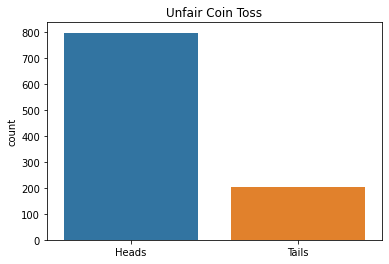

In [18]:
coin_flips = ['Heads', 'Tails'] #To illustrate the p argument for choice, I'm going to set an array to represent coin flips
cheat_coin = rng.choice(coin_flips, p=[0.8, 0.2], size=1000) #Here I weight heads to happen 80% of the time and tails as 20% and return an array of size 1000 to clearly show the impact 
unique_elements, counts_elements = np.unique(cheat_coin, return_counts=True) #np.unique here returns the unique elements and total count of elements in the array code snippet was inspired from: https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php
print("Using an unfairly weighted coin first element in array is heads and second is tails -",counts_elements)

#Finally I use seaborn countplot to show a barchart comparing the heads vs. tails
sns.countplot(x=cheat_coin).set(title='Unfair Coin Toss');

choice gives a lot of functionality, it allows us to pick from provided arrays where items are removed from the array as it goes or can be left in place, depending on the desired functionality, this give a way for us to pull samples from a dataset.
It also allows us to weight the items in an array with the probability of picking that item allowing us to use choice to in certain scenarios show outcomes where the chances of items being picked are not even.

### bytes
[bytes documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes)

Returns a random list of bytes.
This is the simplest of the simple random data functions and takes just one input argument that must be of type integer, this argument defines the length of the.

To demonstrate this function below I've shown two examples with single and then multiple bytes returned, these are printed but then so too are the integer representation of each - [see int.from_bytes](https://docs.python.org/3/library/stdtypes.html).

In [19]:
#get a single random byte
print('1 random byte')
byte_str = rng.bytes(1) 
print(byte_str)
#show byte integer representation using byteorder of big
print('Convert to integer where most significant bit is at the begining of the the byte array -',int.from_bytes(byte_str, byteorder='big')) 
#show byte integer representation using byteorder of little
print('Convert to integer where most significant bit is at the end of the the byte array -',int.from_bytes(byte_str, byteorder='little'))

1 random byte
b'O'
Convert to integer where most significant bit is at the begining of the the byte array - 79
Convert to integer where most significant bit is at the end of the the byte array - 79


In [20]:
print('\n2 random bytes')
#get 2 random bytes
byte_str = rng.bytes(2) 
print(byte_str)
#show byte integer representation using byteorder of big
print('Convert to integer where most significant bit is at the begining of the the byte array -', int.from_bytes(byte_str, byteorder='big'))
#show byte integer representation using byteorder of little
print('Convert to integer where most significant bit is at the end of the the byte array -',int.from_bytes(byte_str, byteorder='little')) 


2 random bytes
b't:'
Convert to integer where most significant bit is at the begining of the the byte array - 29754
Convert to integer where most significant bit is at the end of the the byte array - 14964


In [21]:

print('\n10 random bytes')
#get 10 random bytes
byte_str = rng.bytes(10) 
print(byte_str)
#show byte integer representation using byteorder of big
print('Convert to integer where most significant bit is at the begining of the the byte array -', int.from_bytes(byte_str, byteorder='big')) 
#show byte integer representation using byteorder of little
print('Convert to integer where most significant bit is at the end of the the byte array -',int.from_bytes(byte_str, byteorder='little'))


10 random bytes
b'\xe2\xe1\xe4\x86\xec\xd9\x16\xd3\xf5\xd5'
Convert to integer where most significant bit is at the begining of the the byte array - 1071421809654629129254357
Convert to integer where most significant bit is at the end of the the byte array - 1010398723733694659748322


***
## 2.2 Permutations
***
[permutation documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation)

[shuffle documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle)

For permutations in numpy.random we have the functions <b>shuffle</b> and <b>permutation</b>.
<b>Shuffle</b> performs its operation in place, so whatever object you pass into np.random.shuffle() is changed.
<b>Permutation</b> performs its operation on a copy of the object passed to it, so in practice you would set some variable equal to your np.random.permutation() operation to retain it.

For both permutation and shuffle they both only take one input argument, an array or list.

See the next cell for an example of both.

In [22]:
#Declare a simple list that is already ordered
my_list = [1,2,3,4,5,6,7,8,9,10]
print("my_list before it is shuffled:",my_list) #print the list
my_permu_list = rng.permutation(my_list) #perform permutation, assign variable to result
print("my_list after permutation:",my_list) #print original my_list, show it has not changed
print("my_permu_list:", my_permu_list) #print the permutation list
rng.shuffle(my_list) #perform shuffle on my_list
print("my_list after shuffle:", my_list) #finally show my_list again, now it has changed

my_list before it is shuffled: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_list after permutation: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_permu_list: [ 5  2  4  9  8  6  1  7 10  3]
my_list after shuffle: [4, 1, 7, 10, 3, 2, 8, 9, 6, 5]


From the above we can see that while I provided a list for both permutation and shuffle, it still works despite it not being a numpy array, interestingly we can see that after shuffling the list it still returns as a list but when we assign a variable <i>my_permu_list</i> to the rng.permutation() of the original list, the variable returns as an array, not a list like the object rng.permutation() is taking as it's input argument.

***
# 3. Distributions
***
The distributions functions for numpy.random reflect the various probability distributions for their namesakes (https://en.wikipedia.org/wiki/Probability_distributionhttps://en.wikipedia.org/wiki/Probability_distribution).


By using, for example, the uniform distribution function within the numpy.random package we can get returned a randomised represntation of a uniform distribution, which meets the criteria specified in the input arguments when calling the function.
The produced values for the distribution can then be visualised or in turn used for further calculations if there is a need for fake random data.


## Uniform Distribution
[Uniform Distribution Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform)

The uniform distribution takes 3 arguments as its inputs.
- low, this sets the minimum value the distribution can return (the lower bound).
- high, this sets the maximum value the distribution can return (the upper bound).
- size, the number of values to be returned or more strictly the shape of the array to be returned, as size does not need to be a integer input and can be a tuple.

It returns a numpy array whose shape is according to the input arguments and there is some examples of this in the following cell.

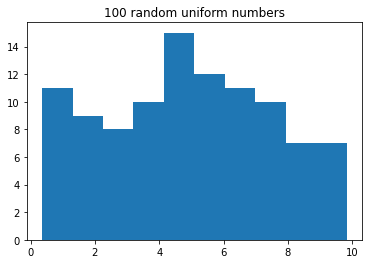

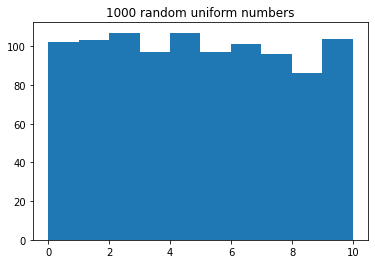

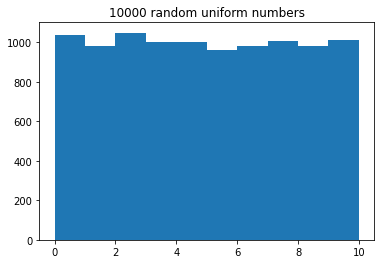

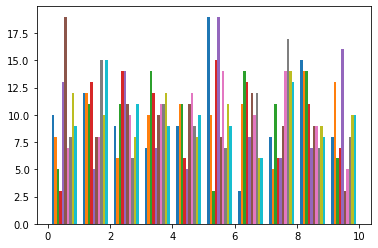

In [23]:
# Using matplotlib.pyplot to show histograms showing output from random.uniform with varying size of array
# rand_uniform = np.random.uniform(low=0,high=10,size=100) alternative way without using user defined rng object
rand_uniform = rng.uniform(low=0,high=10,size=100)
plt.hist(rand_uniform)
plt.title("100 random uniform numbers")
plt.show()
rand_uniform = rng.uniform(low=0,high=10,size=1000)
plt.hist(rand_uniform)
plt.title("1000 random uniform numbers")
plt.show()
rand_uniform = rng.uniform(low=0,high=10,size=10000)
plt.hist(rand_uniform)
plt.title("10000 random uniform numbers")
plt.show()
rand_uniform = rng.uniform(low=0,high=10,size=(100,10))
plt.hist(rand_uniform)
plt.show()


As we can see from the above ceells, the larger a size used for the normal distribution the flatter it becomes as the randomness averages out.

In the final plot it shows 10 different sets of uniform distributions, unfortunately this is fairly hard to see the uniformity between the groups as they are split up.

## Normal Distribution
[Normal Distribution Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal)

With numpy.random.normal it produces a numpy array of normal numbers, when supplying the arguments below of loc=10,and size=100 this gives us an array of 100 numbers normally distributed around 10.

Below I play around with this and show the larger the array, the more normal the histogram ends up looking and therefore the more normal the distribution is.

The normal distribution in numpy takes only two arguments:
- loc, this is the point at which the distribution is centered around.
- size, this is the size of the array to generate, again like with uniform distribution this can be a tuple, which results in a multidimensional array.

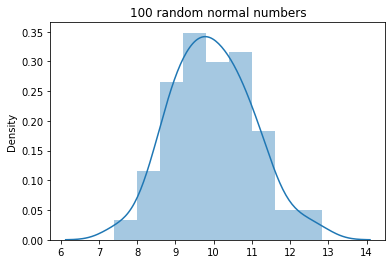

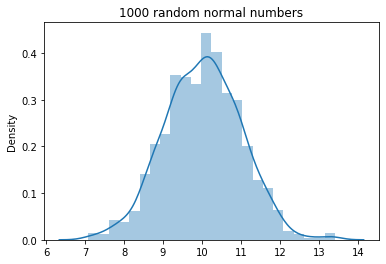

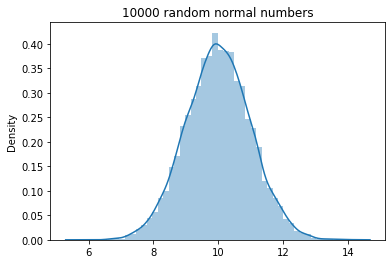

In [24]:
# Using matplotlib.pyplot to show histograms showing output from random.uniform with varying size of array
#rand_normal = np.random.normal(loc=10,size=100)
rand_normal = rng.normal(loc=10,size=100)
sns.distplot(rand_normal)
plt.title("100 random normal numbers")
plt.show()
rand_normal = rng.normal(loc=10,size=1000)
sns.distplot(rand_normal)
plt.title("1000 random normal numbers")
plt.show()
rand_normal = rng.normal(loc=10,size=10000)
sns.distplot(rand_normal)
plt.title("10000 random normal numbers")
plt.show()

The above examples demonstrating picking a random choice from a list of given options, producing a uniform distribution or producing a random normal distribution are all applications that have realy world usages, where someone may want to produce a random distribution to test some model or may want a randomised effect to happen when a script is ran.

Again as with the uniform distribution we can see that the large a size that is used the more normal it looks.

## Binomial Distribution
[Binomial Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial)

With the binomial function from default_rng I can get a binomial distribution, where I provide 3 arguments n number of successes, p probability of success, and size the number of trials to run and array that results

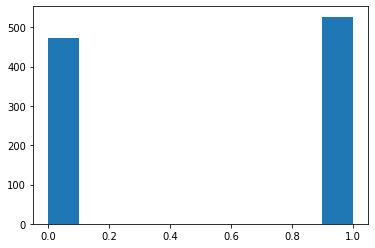

In [25]:
bin_coin_dist = rng.binomial( n=1, p=0.5, size=1000) #distribution for 1 coin flip
plt.hist(bin_coin_dist); #show histogram of distribution

This simple binomial distribution shows when doing a single coin flip 1000 times, you get almost 50% at 0 and 50% at 1, meaning we have 50% chance for having 0 wins or 1 win

In the next Binomial Distribution I test when you do 10 coin flips 1000 times and show what the distribution for wins is, in this case the chance for 0 wins is very low, similarly so for 10 and we have most number of occurences around 5 wins at 250 occurences, this looks very similar to a normal distribution from earlier.

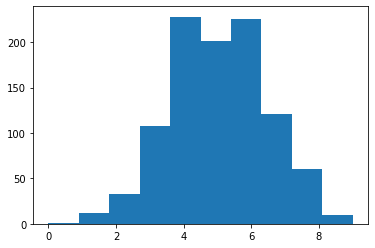

In [26]:
bin_coin_dist = rng.binomial( n=10, p=0.5, size=1000) #distribution for 10 coin flips
plt.hist(bin_coin_dist); #show histogram of distribution

Next I will show an example showing the distribution of values when rolling a dice once and three times over 1000 repeats.

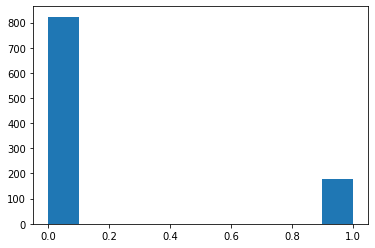

In [27]:
bin_dice_roll = rng.binomial( n=1, p=1/6, size=1000)
plt.hist(bin_dice_roll);

The distribution above shows us that for any given dice roll (say for arguments sake 6) the chances of it occuring once are significantly lower than it occurring 0 times, this is demonstrated by the simulated results shown where 0 occurs > 180 times and 1 occurs < 200 times

Similarly below I do this over 3 dice rolls, as you can see the probability for getting 3 of the same dice roll are very low, getting exactly 1 is a lot higher but still getting 0 occurence of the dice is still the most likely, I suspect the large a value we use for n greater than 6, the less likely getting 0 occurrences will be.

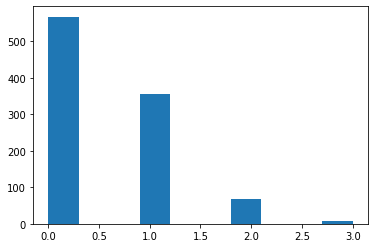

In [28]:
bin_dice_roll = rng.binomial( n=3, p=1/6, size=1000)
plt.hist(bin_dice_roll);

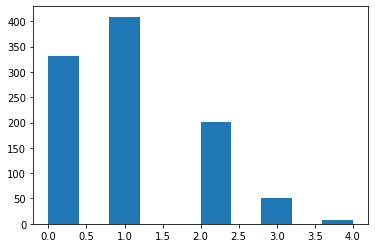

In [29]:
bin_dice_roll = rng.binomial( n=6, p=1/6, size=1000)
plt.hist(bin_dice_roll);

We can see with the last distribution example that in fact with n=6, the chances of getting exactly one roll of 6 is now higher than getting zero occurrences of it. 

## Exponential Distribution
[exponential documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential)

An exponential distribution just shows us how a value grows exponentially, this can be easily shown similarly by squaring values.
Interestingly with the exponential distribution, regardless of the value used for the scale argument, we see a somewhat jagged line in the plot for when using values of size < 1000, the higher the value we provide for size, the smoother the line is (presumably due to the amount of values smoothing it out)

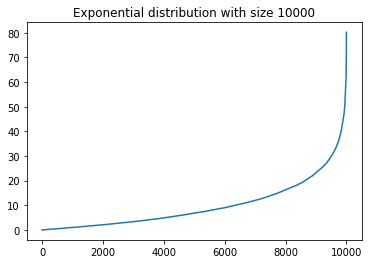

In [30]:
exp_dist_array = rng.exponential(scale=10, size=10000)
#to plot the array with a line plot, first need to sort it, otherwise line will go all over
exp_dist_array.sort()
plt.plot(exp_dist_array)
plt.title('Exponential distribution with size 10000');

When comparing the histogram vs. the plot we see an interesting parallel that looks initially like the reverse, in fact what is being shown in the histogram is the number of values at the lower end being so much smaller, this is higlighted below with the minimum value in the exponential distribution array.

minimum value in the array - 0.0003092825379177824
maximum value in the array - 80.19114464661327


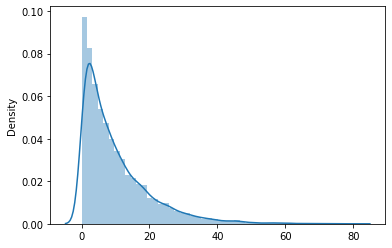

In [31]:
sns.distplot(exp_dist_array);
print('minimum value in the array -', min(exp_dist_array))
print('maximum value in the array -', max(exp_dist_array))

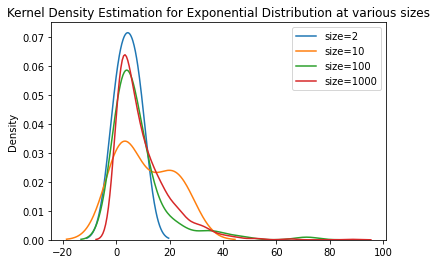

In [32]:
sns.distplot(rng.exponential(scale=10, size=2), hist=False, label='size=2')
sns.distplot(rng.exponential(scale=10, size=10), hist=False, label='size=10')
sns.distplot(rng.exponential(scale=10, size=100), hist=False, label='size=100')
sns.distplot(rng.exponential(scale=10, size=1000), hist=False, label='size=1000')
plt.title('Kernel Density Estimation for Exponential Distribution at various sizes')
plt.legend();

In the last plot for exponential distributions I overlay distributions with different size arguments

## Logistic Distribution
[logistic documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.logistic.html#numpy.random.Generator.logistic)

A logistic distribution looks very similar to a normal distribution.
It centers around the provided loc value in much the same way as with the normal distribution however it also takes an argument for it's scale.

Interestingly Logistic Distributions are used by the World Chess Federation for it's ranking system.

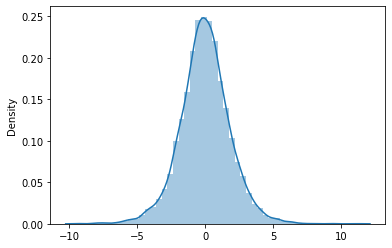

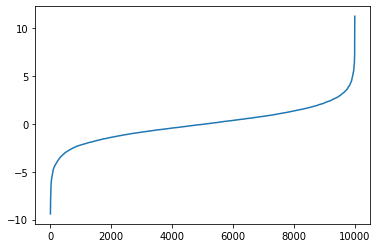

In [33]:
log_dist_array = np.random.default_rng().logistic(loc=0, scale=1, size=10000)
log_dist_array.sort() #sorting the array to do lineplot
sns.distplot(log_dist_array)
plt.show();
plt.plot(log_dist_array);

<AxesSubplot:ylabel='Density'>

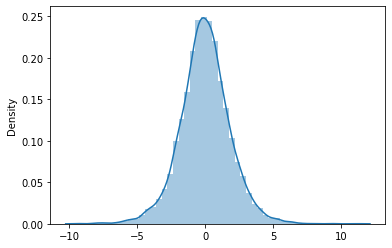

In [34]:
#Alternately will use sns.distplot to give a nicer visual representation than matplotlip.pyplot's hist
sns.distplot(log_dist_array)

## Laplace Distribution
[Laplace Distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.laplace.html#numpy.random.Generator.laplace)

Laplace distributions look very similar to Normal and Logistic Distributions but with a much narrower peak and steeper sides. It is often used for economics and health sciences.

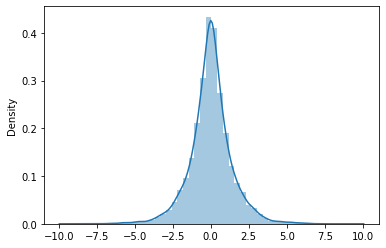

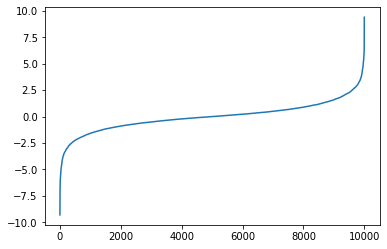

In [35]:
laplace_dist_array = np.random.default_rng().laplace(loc=0, scale=1, size=10000)
laplace_dist_array.sort() #sorting the array to do lineplot
sns.distplot(laplace_dist_array)
plt.show();
plt.plot(laplace_dist_array);

# 4. Seeds
***
Seeds are used to initialize the Bit Generator and by using a seed we can guarantee a predictable output, which can be demonstrated below.
Before this point in the notebook no value for the seed was passed to the random number generator and so the random number generator relied on entropy from the OS of the computer currently running this notebook to get it's seed.

Seed is infact the only input argument to the default_rng so can be fairly easily demonstrated.
https://numpy.org/doc/stable/reference/random/generator.html


In [36]:
#initialize a rng with 1 as its seed
rng_seeded_1 = np.random.default_rng(1)
print("First loop of five random numbers")
#print first 5 random floats generated with the above seed
for i in range(5):
    print(rng_seeded_1.random())

#initialize a different rng with 1 as its seed
rng_seeded_2 = np.random.default_rng(1)
print("\nSecond loop of five random numbers after re-assigning seed value")
#again print the first 5 random floats of this rng to demonstrate the values are the same
for i in range(5):
    print(rng_seeded_2.random())

#
print("\nThis loop demonstrates re-assigning seed value as part of loop so we keep getting same random value")
for i in range(5):
    rng_seeded = np.random.default_rng(1)
    print(rng_seeded.integers(5))

First loop of five random numbers
0.5118216247002567
0.9504636963259353
0.14415961271963373
0.9486494471372439
0.31183145201048545

Second loop of five random numbers after re-assigning seed value
0.5118216247002567
0.9504636963259353
0.14415961271963373
0.9486494471372439
0.31183145201048545

This loop demonstrates re-assigning seed value as part of loop so we keep getting same random value
2
2
2
2
2


In [37]:
print("This last example shows a quirk I noticed when playing around with different combinations")
for i in range(5):
    rng_seeded = np.random.default_rng(1)
    integers_low_arg = ((i+5)*2)
    print(f'Providing {integers_low_arg} to rng_seeded.integers gives - {rng_seeded.integers((i+5)*2)}')

This last example shows a quirk I noticed when playing around with different combinations
Providing 10 to rng_seeded.integers gives - 4
Providing 12 to rng_seeded.integers gives - 5
Providing 14 to rng_seeded.integers gives - 6
Providing 16 to rng_seeded.integers gives - 7
Providing 18 to rng_seeded.integers gives - 8


The previous cell I found very interesting and am curious as to what is occurring, I would suspect that while the seed is allowing for consistent random numbers to be picked integers is taking the consistency that seed provides and adding it's own element of randomness to that based on it's input argument's.

The pattern I found interesting above was that as the input argument goes up by 2, the rng.integers returns (which is being reset every loop) 1 higher than the previous time.

In [38]:
rgb_list = ['red', 'green', 'blue']
rng_seeded_1 = np.random.default_rng(1)
print(f'With seed set to 1, I will always get - {rng_seeded_1.choice(rgb_list)}, {rng_seeded_1.choice(rgb_list)}, {rng_seeded_1.choice(rgb_list)}')
rng_seeded_2 = np.random.default_rng(1)
print(f'Proof - {rng_seeded_2.choice(rgb_list)}, {rng_seeded_2.choice(rgb_list)}, {rng_seeded_2.choice(rgb_list)}')

With seed set to 1, I will always get - green, green, blue
Proof - green, green, blue


## Bit Generators compared PCG64 vs. Mersenne Twister
***
PCG64 is the default bit generator used for numpy version 1.19.
(https://numpy.org/doc/stable/reference/random/generator.html?highlight=pcg64)

Mersenne Twister is the previous default bit generator until the latest version of numpy.
(https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState)

PCG64 is now the default bit generator due to its Statistical quality, it's performance time and minimal code size and complexity to name but a few reasons (see https://www.pcg-random.org/index.html for tabular comparison of PCG64 vs other Bit Generators and in particular Mersenne Twister).
Statistical quality refers to how likely is the random number generator to fail a test for true randomness.



In [39]:
%%timeit
np.random.MT19937(1)

142 µs ± 4.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
%%timeit
np.random.PCG64(1)

24.8 µs ± 206 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Performing a very rudimentary timeing of the running Mersenne Twister and PCG64 (while still taking a relatively miniscule time in both cases), PCG64 performs significantly faster, at more than 5 times the speed. 
This can also be observed simply by seeing how many times it takes for each to run 10000 times.